### What type of programmer has the highest level of salary.
In order to know what kind of programmer has the highest level of salary. We need to extract the field of salary and developer types. Developer types could be found using the following code:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import defaultdict
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will look into the summary of different developer types to get a feeling about what type we will deal with.

In [2]:
developer_type = df['DeveloperType'].value_counts().reset_index()

developer_type.head()

,index,DeveloperType
0,Web developer,4283
1,Web developer; Desktop applications developer,775
2,Web developer; Mobile developer,573
3,Desktop applications developer,561
4,Mobile developer,559


In [3]:
# Clean the data
subdf = df[['DeveloperType', 'Salary']]
subdf_dna = subdf.dropna().reset_index()
subdf_dna.head()

,index,DeveloperType,Salary
0,2,Other,113750.0
1,14,Embedded applications/devices developer,100000.0
2,17,Web developer; Embedded applications/devices d...,130000.0
3,18,Web developer,82500.0
4,22,Other,100764.0


In [4]:
def get_possible_types(df, typecol):
    '''
    INPUT:
    df - the pandas dataframe
    typecol - type column name
    
    OUTPUT:
    possible_types - a set of possible developer types
    '''
    possible_types = set()
    developer_type = df[typecol].value_counts().reset_index()
    for typestr in developer_type['index']:
        types = typestr.split(";")
        for devtype in types:
            possible_types.add(devtype.strip())
        
    return possible_types

def to_dict(df, col1, col2, possible_types):
    '''
    INPUT:
    df - the pandas dataframe
    col1 - column to be analysed
    col2 - column contains the value
    possible_types - possible values for col1
    '''
    list_dict = {}
    for val in possible_types:
        list_dict[val] = []
    #loop through list of ed types
    for val in possible_types:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                #new_df[val] += int(df[col2][idx])
                list_dict[val].append(df[col2][idx])
    return list_dict
    
def median_col(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to get median from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    salarylist_dict = to_dict(df, col1, col2, look_for)
    for key in salarylist_dict.keys():
        sallist = pd.Series(salarylist_dict[key])
        qtiles = [sallist.quantile(0.25), sallist.quantile(0.5), sallist.quantile(0.75)]
        salarylist_dict[key] = qtiles
    
    new_df = pd.DataFrame.from_dict(salarylist_dict)
    new_df = new_df.transpose()
    new_df.columns = ['.25', 'median', '.75']
    new_df.sort_values('median', ascending=False, inplace=True)
    return new_df
    
possible_types = get_possible_types(df, 'DeveloperType')

# Get the quantile points
qpoints = median_col(subdf_dna, 'DeveloperType', 'Salary', possible_types)
qpoints

,.25,median,.75
Other,38709.677419,75000.000000,106060.606061
DevOps specialist,40860.215054,65000.000000,97000.000000
Machine learning specialist,32258.064516,60215.053763,108000.000000
Data scientist,34543.010753,59257.392473,95000.000000
Developer with a statistics or mathematics background,30540.328896,56818.181818,91750.000000
Quality assurance engineer,25858.620989,53763.440860,89464.285714
Embedded applications/devices developer,27150.537634,53763.440860,80000.000000
Systems administrator,30107.526882,51612.903226,80000.000000
Desktop applications developer,30000.000000,51000.000000,80000.000000
Web developer,26881.720430,50000.000000,80645.161290


The quantile points looks fine, we can now plot it.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f699f618a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f699f630438>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f699f618908>,
 'medians': [<matplotlib.lines.Line2D at 0x7f699f630c88>,
 'fliers': [],
 'means': []}

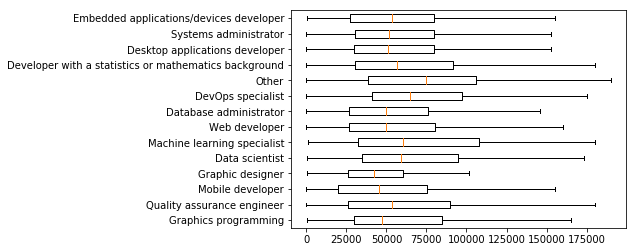

In [5]:
salary_dict = to_dict(subdf_dna, 'DeveloperType', 'Salary', possible_types)

plt.boxplot(salary_dict.values(), showfliers = False, labels = salary_dict.keys(), vert = False)

### What type of job is the most popular one?

I'm also interested in what type of developer job is the most popular one. For this step, we can reuse the previous data frame, but this time data cleaning method need to be changed.

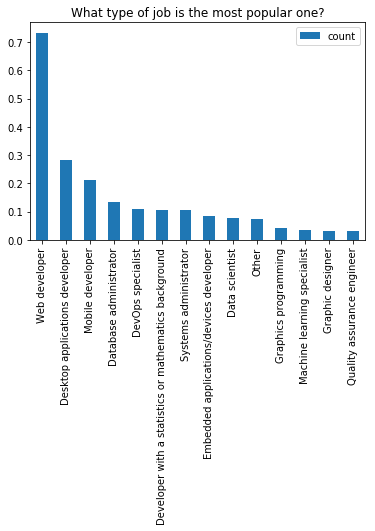

In [7]:
subdf_dnadt = subdf.dropna(subset=['DeveloperType']).reset_index()
type_dict = to_dict(subdf_dnadt, 'DeveloperType', 'Salary', possible_types)

def converttocount(type_dict):
    anotherdict = {}
    for key in type_dict.keys():
        anotherdict.update({key: len(type_dict[key])})
    return anotherdict

totalcount = subdf_dnadt.shape[0]

count_dict = converttocount(type_dict)
type_count = pd.DataFrame(count_dict, index = ['count'])
type_count = type_count.transpose().sort_values(by = 'count', ascending = False)


(type_count/totalcount).plot(kind="bar");
plt.title("What type of job is the most popular one?");
